In [1]:

import metpy.calc as mpcalc
from metpy.plots import StationPlot, add_metpy_logo, add_unidata_logo, add_timestamp
from metpy.units import units
from siphon.catalog import TDSCatalog
from siphon.simplewebservice.ndbc import NDBC

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patheffects as mpatheffects
import matplotlib.pyplot as plt
import numpy as np

import ipywidgets as widgets

In [20]:
top_cat = TDSCatalog('http://thredds.ucar.edu/thredds/catalog.xml')
Ref = []
for ref in top_cat.catalog_refs:
    Ref.append(ref)
top_widget = widgets.Dropdown(description='top', options=[Ref[0],Ref[1],Ref[2],Ref[3],Ref[4],Ref[5]])
x = widgets.interact_manual(top=top_widget)
x.kwargs["top"]

Dropdown(description='top', options=('Forecast Model Data', 'Forecast Products and Analyses', 'Observation Dat…

In [21]:
top = x.kwargs['top']
top = top.value
print(top)

Satellite Data


In [41]:
ref = top_cat.catalog_refs[top]
ref.href

new_cat = ref.follow()
Ref2 = []
for ref in new_cat.catalog_refs:
    Ref2.append(ref)
Options = []
for i in Ref2:
    Options.append(i)
ref_widget = widgets.Dropdown(description='product', options=Options)

x = widgets.interact_manual(product=ref_widget)
x.kwargs["product"]

Dropdown(description='product', options=('GOES16', 'GOES16 GRB', 'GOES17', 'GOES17 GRB', 'West CONUS 4km', 'Ha…

In [53]:

Ref3 = []
for ref in new_cat.datasets:
    Ref3.append(ref)
print(Ref3)

Options3 = []
for i in Ref3:
    Options3.append(i)
ref_widget3 = widgets.Dropdown(description='product', options=Options3)
x3 = widgets.interact_manual(product=ref_widget3)
x3.kwargs["product"]

['West CONUS 4km Aggregation', 'Super National 1km Aggregation']


Dropdown(description='product', options=('West CONUS 4km Aggregation', 'Super National 1km Aggregation'), valu…

In [55]:
top3 = x.kwargs['product']
top3 = top3.value
print(top3)

West CONUS 4km Aggregation


In [56]:
ds = new_cat.datasets[product]
print("Variable Name:",ds.name)
print("Path:",ds.url_path)

Variable Name: West CONUS 4km Aggregation
Path: satellite/3.9/WEST-CONUS_4km


In [59]:
top_cat

Unidata THREDDS Data Server

In [2]:
GOES_num = '16'
sector = 'CONUS'
channel = '09'

In [3]:
cat = TDSCatalog('http://thredds-test.unidata.ucar.edu/thredds/catalog/satellite/goes'+GOES_num+\
                 '/GOES'+GOES_num+'/'+sector+'/Channel'+channel+'/current/catalog.xml')
sat = cat.datasets[-1].remote_access(use_xarray=True)
var = sat.metpy.parse_cf('Sectorized_CMI')

In [ ]:
sat = cat.datasets[-1].remote_access(use_xarray=True)
var = sat.metpy.parse_cf('Sectorized_CMI')


Text(0.99, 0.01, 'Created: 2019-03-26T14:49:15Z')

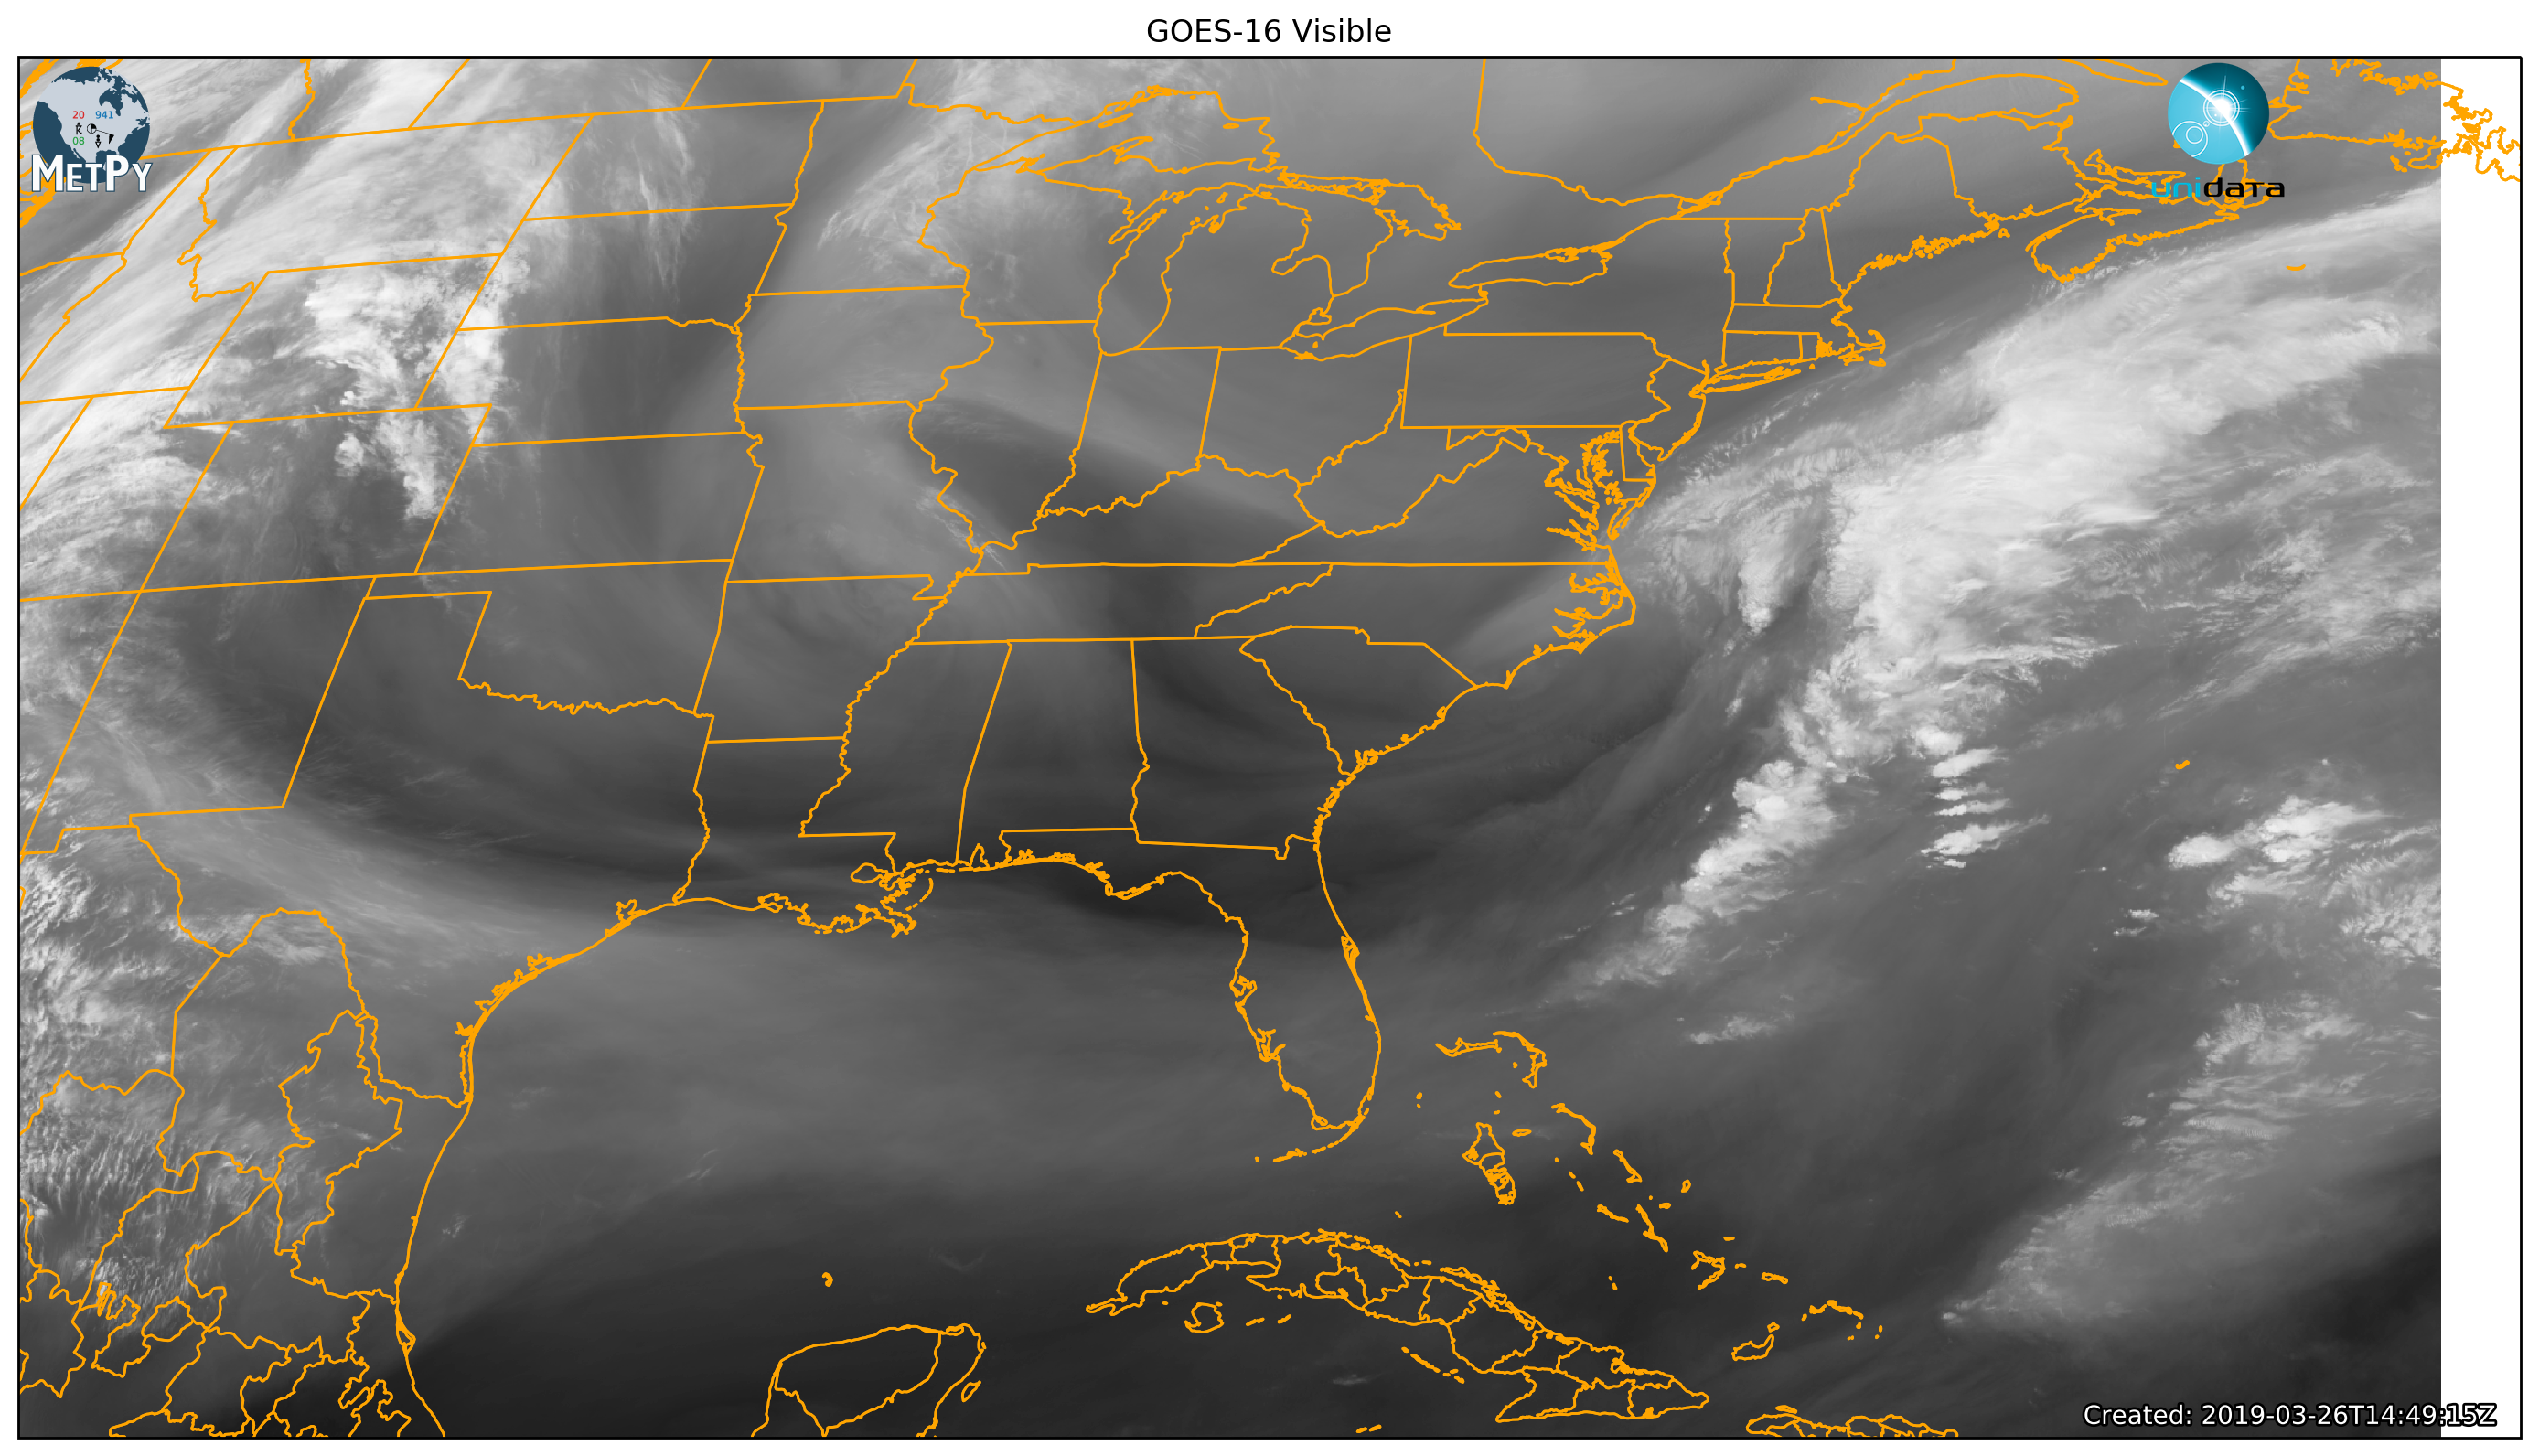

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(20, 10), dpi=200)
ax = fig.add_subplot(1, 1, 1, projection=var.metpy.cartopy_crs)


kwargs = dict(path_effects=[mpatheffects.withStroke(foreground='white', linewidth=2)],
              clip_on=True)

ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='orange')
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='orange')
#ax.set_extent([-85, -69, 27, 38], crs=ccrs.PlateCarree())
ax.set_extent([-105, -60, 20, 50], crs=ccrs.PlateCarree())
#ax.set_extent([-81, -80, 27, 28], crs=ccrs.PlateCarree())

ax.imshow(np.sqrt(var), extent=(var.x[0], var.x[-1], var.y[-1], var.y[0]), cmap='Greys', origin='upper')

ax.set_title('GOES-16 Visible')
add_unidata_logo(fig, y=1375, x=2350, size='large')
add_metpy_logo(fig, y=1375, x=25, size='large')
add_timestamp(ax, high_contrast=True, y=0.01)
#plt.savefig('florence.png', dpi=200, bbox_inches='tight')